# Projeto Final C.D.
## Clusterização de jogadores do Fifa 17

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

In [3]:
# https://pythonprogramming.net/flat-clustering-machine-learning-python-scikit-learn/

# link tutorial de clusterização usando python e algoritimo de K-means

In [2]:
#Lendo banco de dados
dados=pd.read_excel("FUT_17_Players.xlsx", sep=',')


In [9]:
dados.shape

(14501, 78)

In [11]:
dados.head()

,id,commonName,firstName,headshotImgUrl,lastName,league,nation,club,headshot,specialImages,...,rawAttributeChemistryBonus,isLoan,squadPosition,itemType,discardValue,modelName,baseId,rating,created_at,updated_at
0,190043,Pelé,Edson,https://fifa17.content.easports.com/fifa/fltOn...,Arantes Nascimento,2118,54,112658,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:148:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",...,NaN,NaN,NaN,player,NaN,FUTPlayerItem,190043,95,2016-09-21 16:33:58,2016-09-21 16:33:58
1,20801,Cristiano Ronaldo,C. Ronaldo,https://fifa17.content.easports.com/fifa/fltOn...,dos Santos Aveiro,53,38,243,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:147:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",...,NaN,NaN,NaN,player,NaN,FUTPlayerItem,20801,94,2016-09-21 16:33:58,2016-09-21 16:33:58
2,158023,NaN,Lionel,https://fifa17.content.easports.com/fifa/fltOn...,Messi,53,52,241,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:148:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",...,NaN,NaN,NaN,player,NaN,FUTPlayerItem,158023,93,2016-09-21 16:33:58,2016-09-21 16:33:58
3,168473,NaN,Franz,https://fifa17.content.easports.com/fifa/fltOn...,Beckenbauer,2118,21,112658,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:148:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",...,NaN,NaN,NaN,player,NaN,FUTPlayerItem,168473,93,2016-09-21 16:33:58,2016-09-21 16:33:58
4,1109,NaN,Paolo,https://fifa17.content.easports.com/fifa/fltOn...,Maldini,2118,27,112658,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:146:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",...,NaN,NaN,NaN,player,NaN,FUTPlayerItem,1109,92,2016-09-21 16:33:58,2016-09-21 16:33:58


In [28]:
n=0
for h in dados.columns:
    print (h, " - coluna:",n)
    n=n+1    

id  - coluna: 0
commonName  - coluna: 1
firstName  - coluna: 2
headshotImgUrl  - coluna: 3
lastName  - coluna: 4
league  - coluna: 5
nation  - coluna: 6
club  - coluna: 7
headshot  - coluna: 8
specialImages  - coluna: 9
position  - coluna: 10
playStyle  - coluna: 11
playStyleId  - coluna: 12
height  - coluna: 13
weight  - coluna: 14
birthdate  - coluna: 15
age  - coluna: 16
acceleration  - coluna: 17
aggression  - coluna: 18
agility  - coluna: 19
balance  - coluna: 20
ballcontrol  - coluna: 21
foot  - coluna: 22
skillMoves  - coluna: 23
crossing  - coluna: 24
curve  - coluna: 25
dribbling  - coluna: 26
finishing  - coluna: 27
freekickaccuracy  - coluna: 28
gkdiving  - coluna: 29
gkhandling  - coluna: 30
gkkicking  - coluna: 31
gkpositioning  - coluna: 32
gkreflexes  - coluna: 33
headingaccuracy  - coluna: 34
interceptions  - coluna: 35
jumping  - coluna: 36
longpassing  - coluna: 37
longshots  - coluna: 38
marking  - coluna: 39
penalties  - coluna: 40
positioning  - coluna: 41
potentia

In [5]:
#teste de clusterização básica (flat clustering)

#sklearn recebe os dados no formato numpy array
X = np.array([[1, 2],     
              [5, 8],
              [1.5, 1.8],
              [8, 8],
              [1, 0.6],
              [9, 11]])


kmeans = KMeans(n_clusters=2) #inicializa o número de clusters
kmeans.fit(X)   #"fit" da data (learning) 

centroids = kmeans.cluster_centers_ #pegando os valores das centroides do "fiting"
labels = kmeans.labels_ #labels que o programa deu 

print(centroids)
print(labels)

[[ 7.33333333  9.        ]
 [ 1.16666667  1.46666667]]
[1 0 1 0 1 0]


coordinate: [ 1.  2.] label: 1
coordinate: [ 5.  8.] label: 0
coordinate: [ 1.5  1.8] label: 1
coordinate: [ 8.  8.] label: 0
coordinate: [ 1.   0.6] label: 1
coordinate: [  9.  11.] label: 0


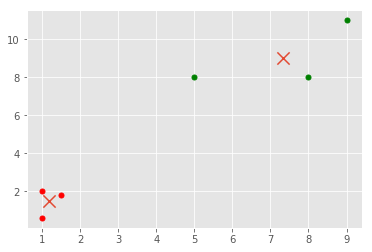

In [6]:
colors = ["g.","r.","c.","y."]

for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

#observando alguns resultados do cluster

# a lista de cores é uma lista que fornecemos para a máquina 
# escolher durante a classificação para facilitar a visualização
# neste caso só foram necessárias duas mas dependendo da quantidade
# de clusters podemos precisar de mais.

#novamente os labels são os nomes de cada grupo que o programa deu


In [7]:
#após a primeira iteração podem ser feitas uma série de implementções
#como cluster multi dimensional e hierárquico.
#demonstrarei mais a seguir.